We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-15 11:56:42--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.117, 13.227.223.89, 13.227.223.83, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.117|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386,Asia
4,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386,Asia
5,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386,Asia
6,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386,Asia
7,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386,Asia
8,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386,Asia
9,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [4]:
df['pcases']  = np.nan
df['pdeaths'] = np.nan

Last check of our source dataframe.

In [5]:
df.count()

dateRep                    16949
day                        16949
month                      16949
year                       16949
cases                      16949
deaths                     16949
countriesAndTerritories    16949
geoId                      16949
countryterritoryCode       16949
popData2018                16949
continentExp               16949
pcases                         0
pdeaths                        0
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-10   2.0  624.0  255.0  0.0  0.0   6.0  146.0  0.0  165.0  42.0  ...   
2020-05-11   1.0  781.0  369.0  0.0  0.0  12.0  138.0  2.0   13.0  10.0  ...   
2020-05-12   1.0  680.0  285.0  0.0  0.0   4.0   79.0  0.0  245.0  87.0  ...   
2020-05-13   2.0  783.0  280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   
2020-05-14   2.0  725.0  259.0  0.0  0.0   4.0  180.0  0.0  316.0  54.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-10     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-11     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-12     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-13     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-14     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[136 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('91 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... pdeaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...      VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...     ...  ..  ..   
2020-08-09   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   

                                        
geoId       VI  VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2020-08-09 NaN NaN NaN NaN NaN NaN NaN  
2020-08-10 NaN NaN NaN NaN NaN NaN NaN  
2020-08-11 NaN NaN NaN NaN NaN NaN NaN  
2020-08-12 NaN NaN NaN NaN NaN NaN NaN  
2020-08-13 NaN NaN NaN NaN NaN NaN NaN  

[227 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    227.000000
mean     477.000000
std       65.673435
min      364.000000
25%      420.500000
50%      477.000000
75%      533.500000
max      590.000000
Name: daynum, dtype: float64

In [9]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

JP 233.61525164794716 234.25054013656654 1.0055732682169531
RU 275.0715684733111 311.20555853930387 0.6344299454675557
US 1639.0027423106617 -110.78506596949794 0.356419542252444
BR 168.41475434399234 320.3401560985211 0.9758922430462278
AT 9.33048757066658 419.83657194178807 3.844697341587547
CH 10.838513071867734 416.17162651863714 3.7843328228476008
DE 26.79912983530243 390.06665457330223 2.683240465581994
IT 16.31469325613861 392.55507143140096 4.1180974903859315
ES 8.626668299871536 418.8628686946438 4.698590423163543
FR 21.773311761857236 396.6116015647979 3.051150356656296
SE 333.63174910478375 173.24049094220217 0.8995044147021752
BE 71.89262026229773 350.0654879848307 1.6338858900890276
NL 66.14268171485392 349.4362370343488 1.7563124573945699
NZ 25.542255584657326 413.5709236722721 1.677312023997939


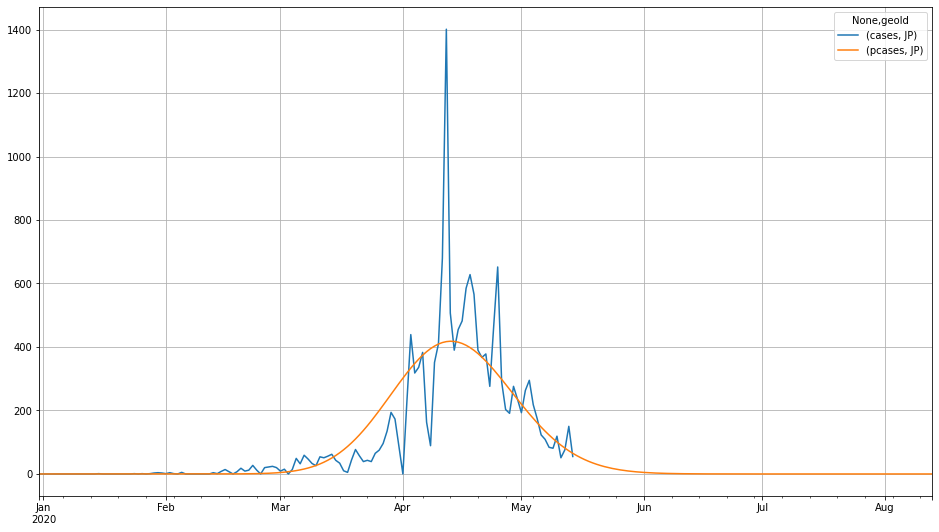

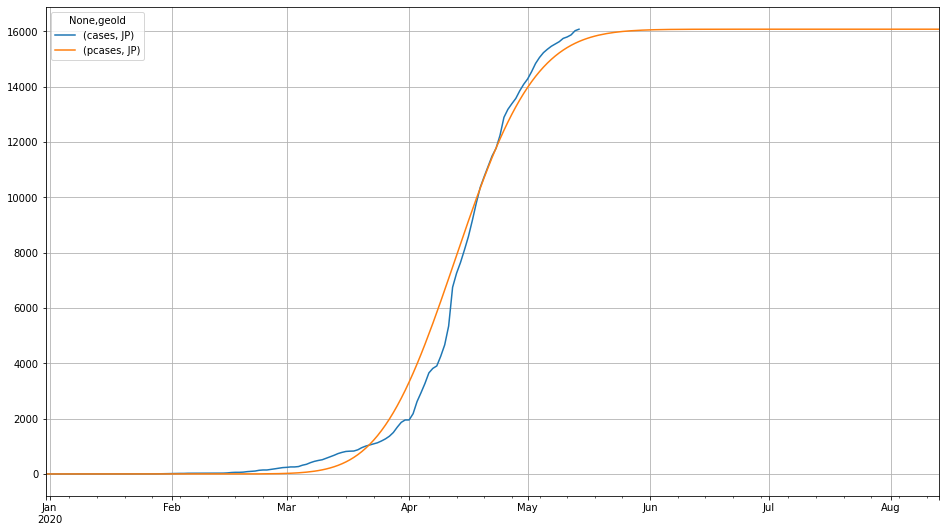

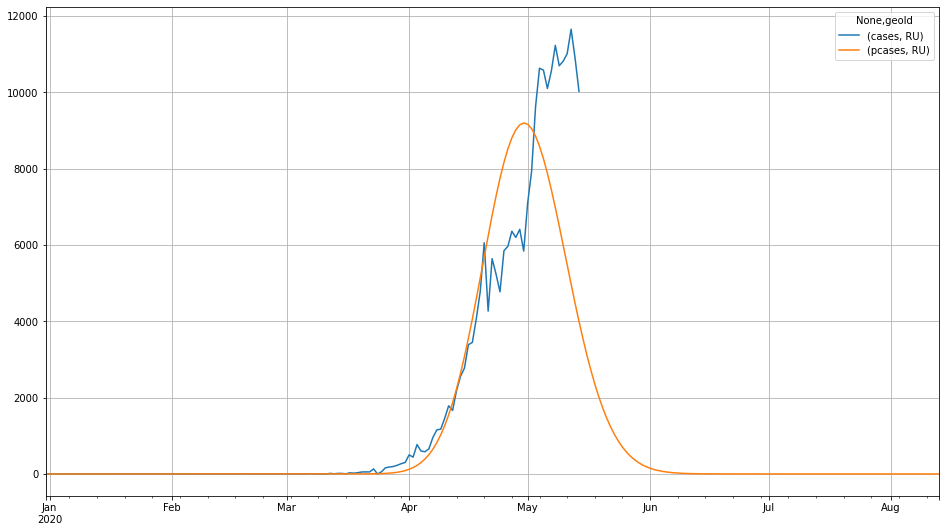

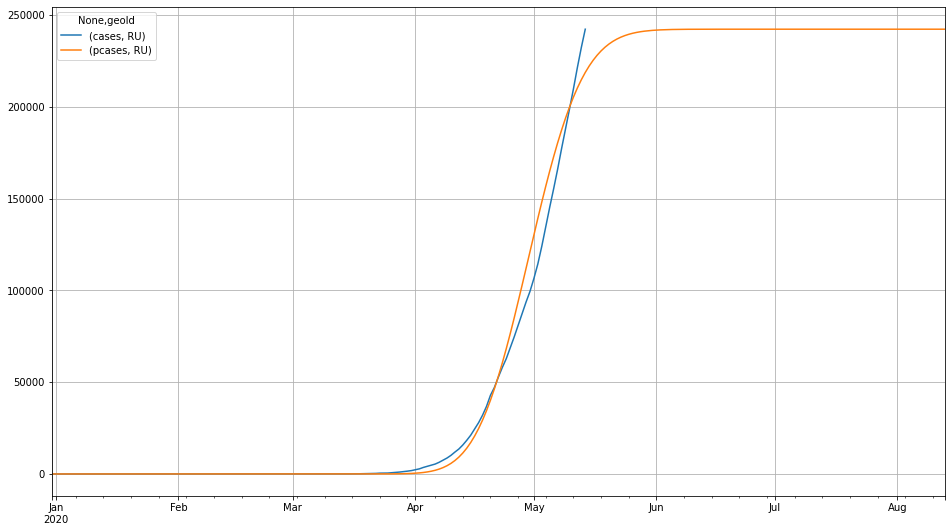

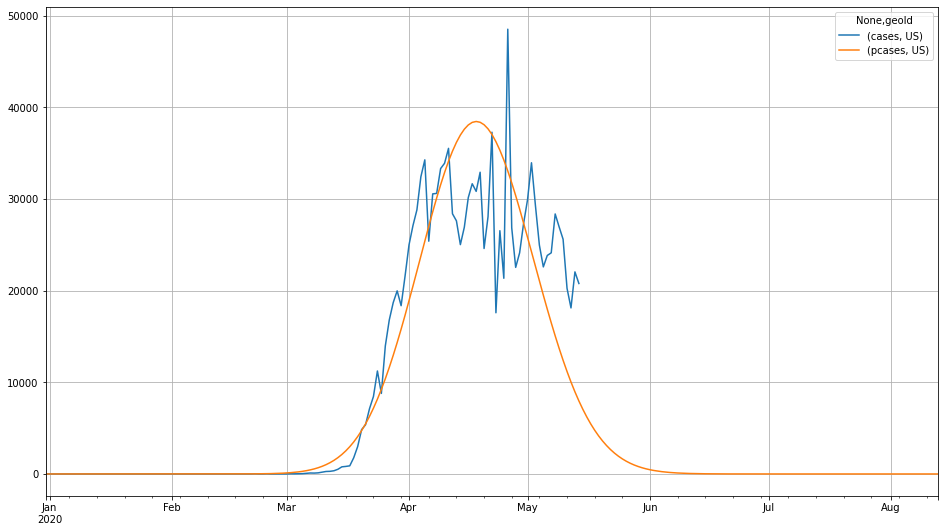

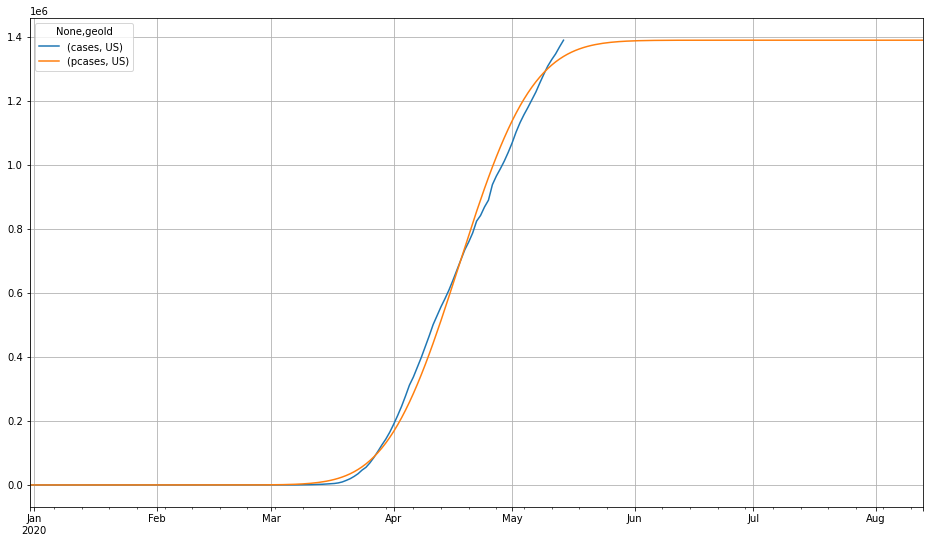

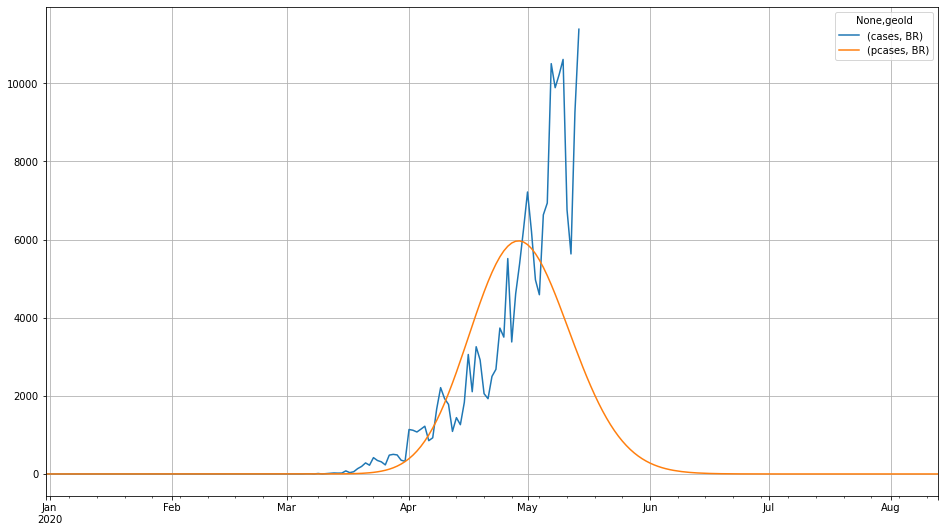

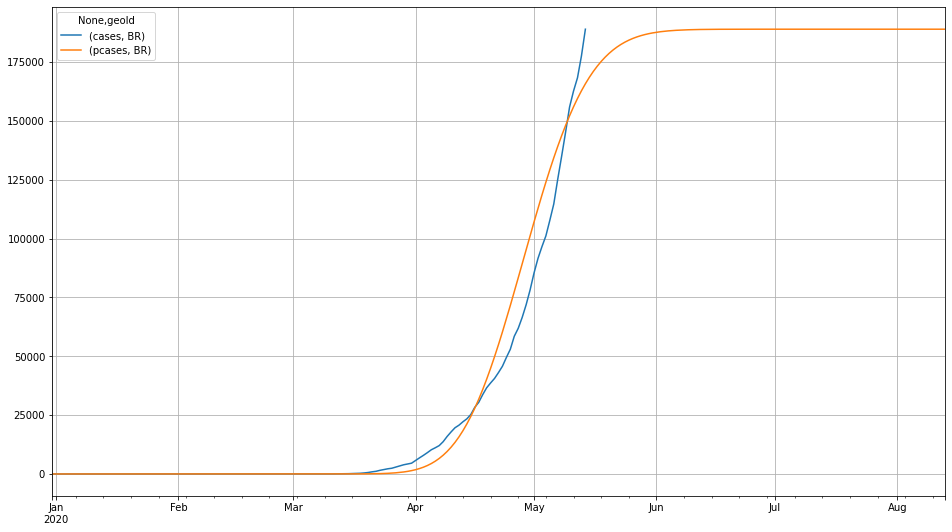

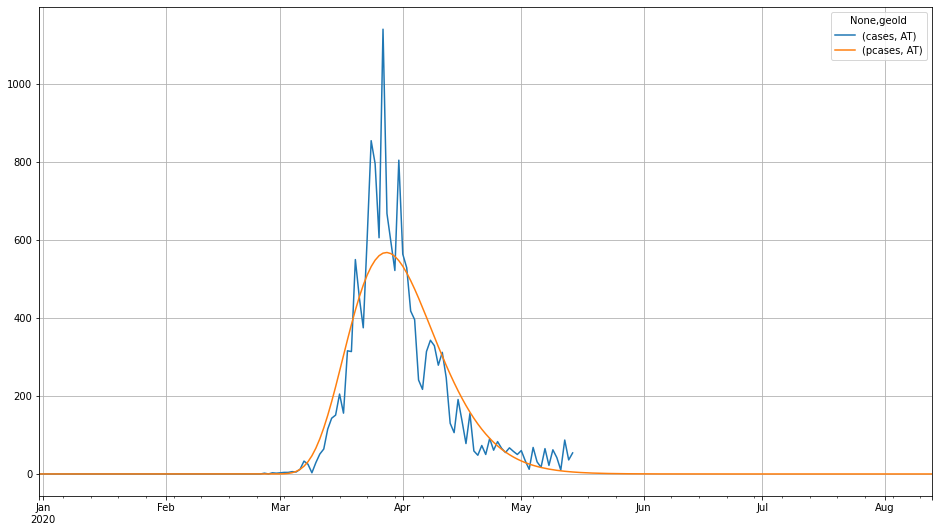

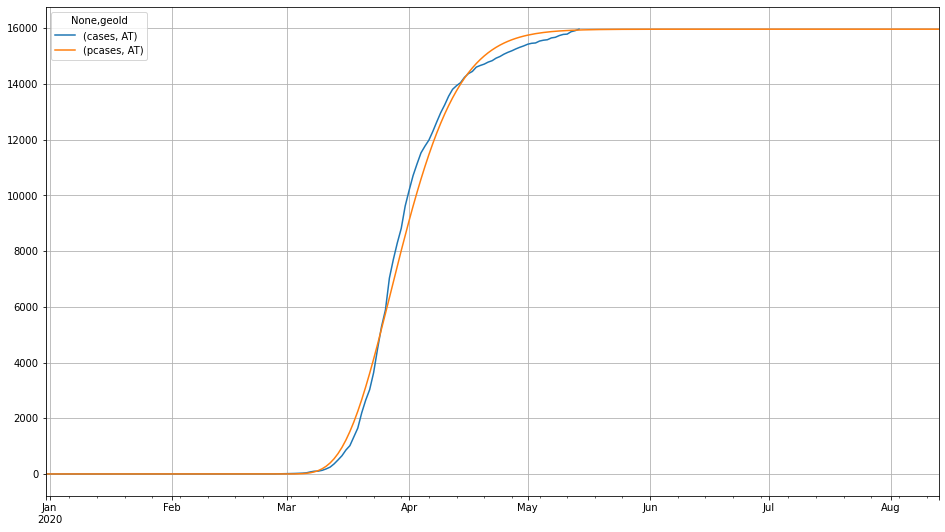

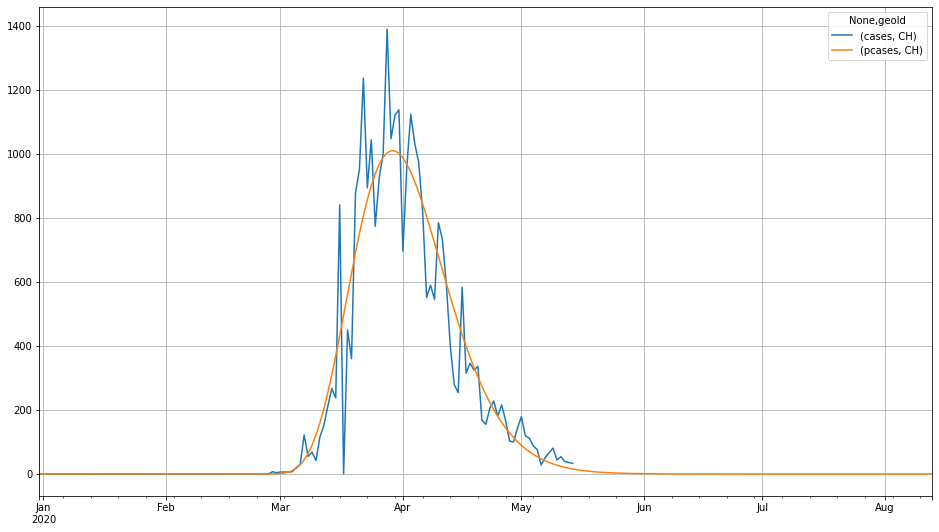

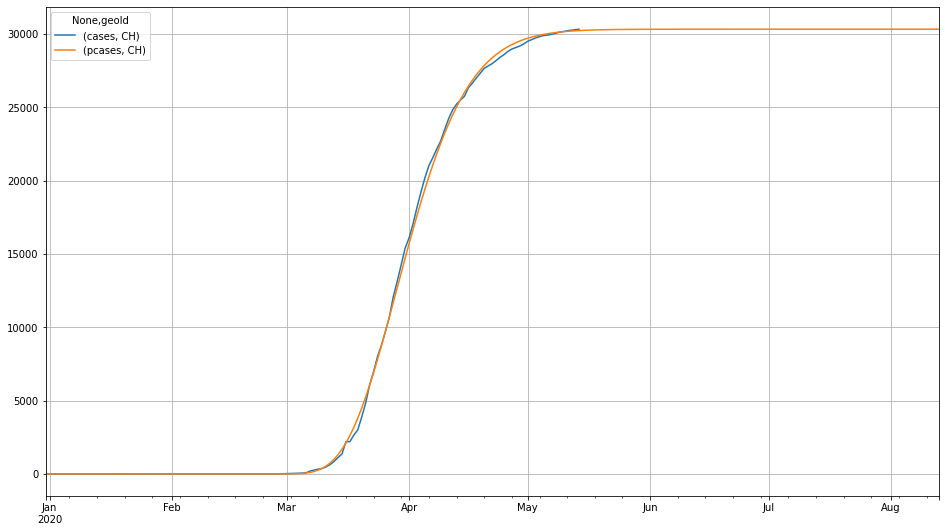

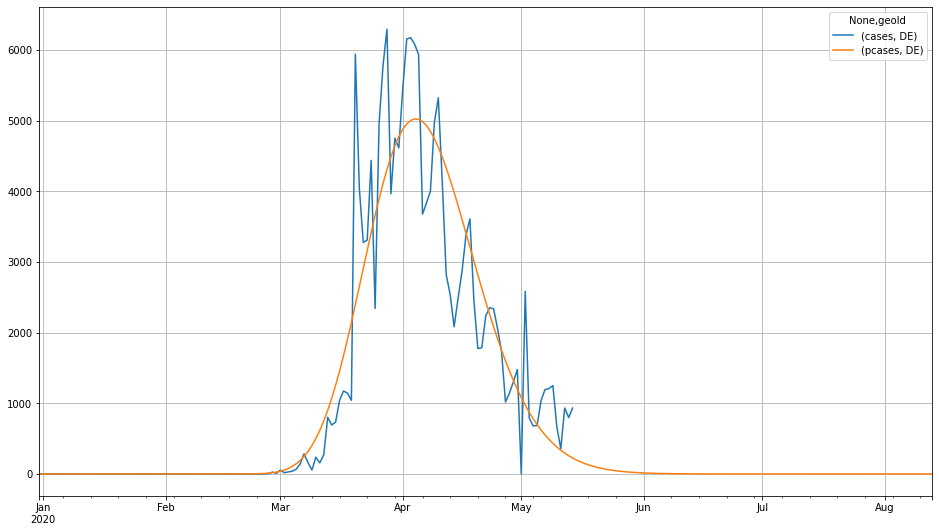

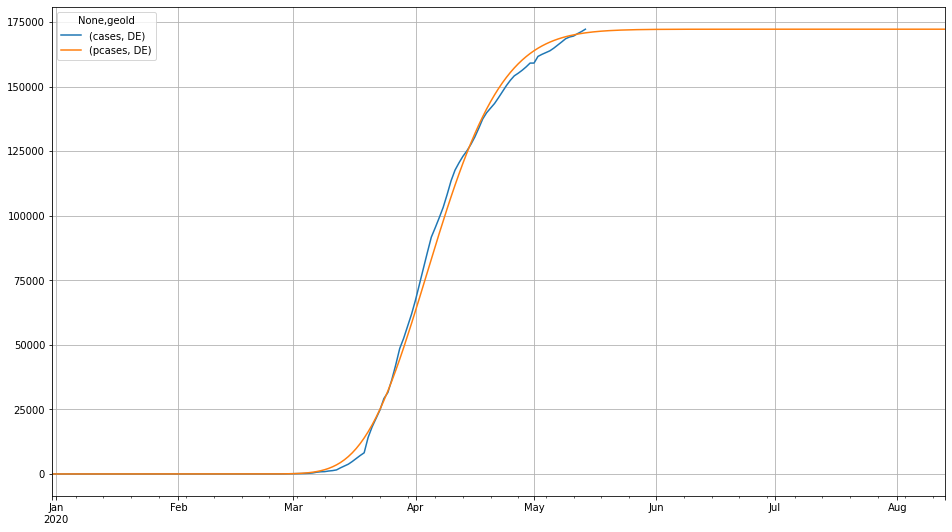

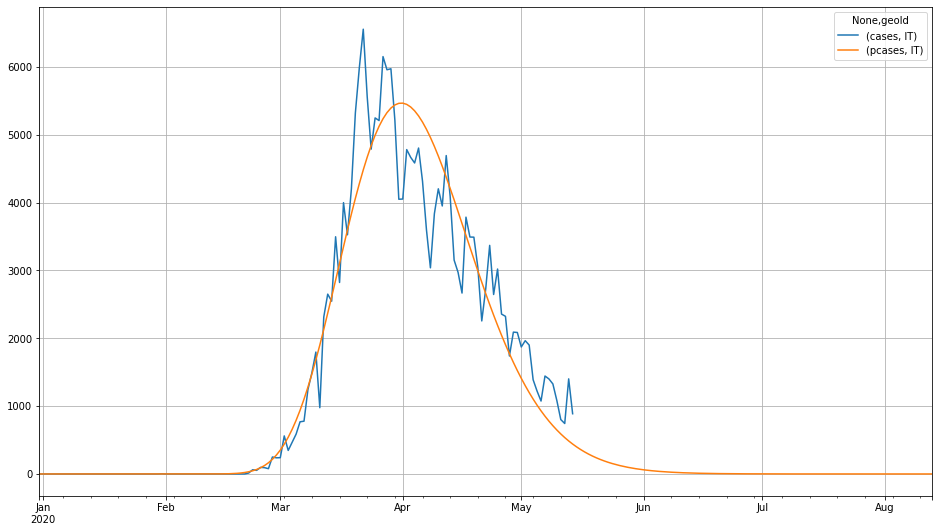

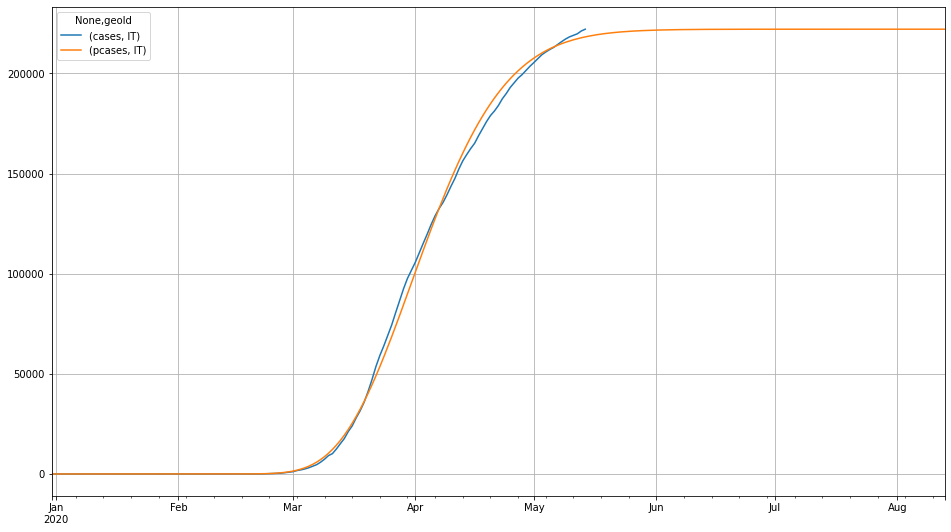

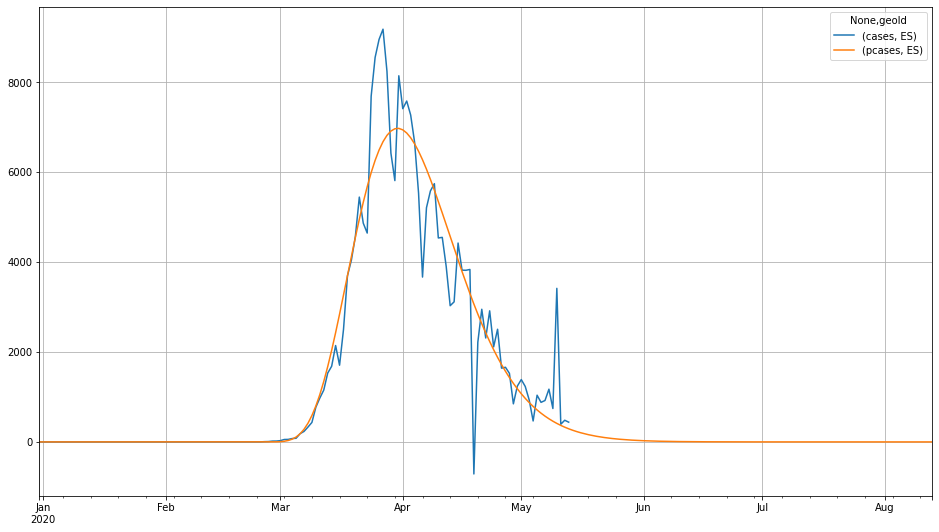

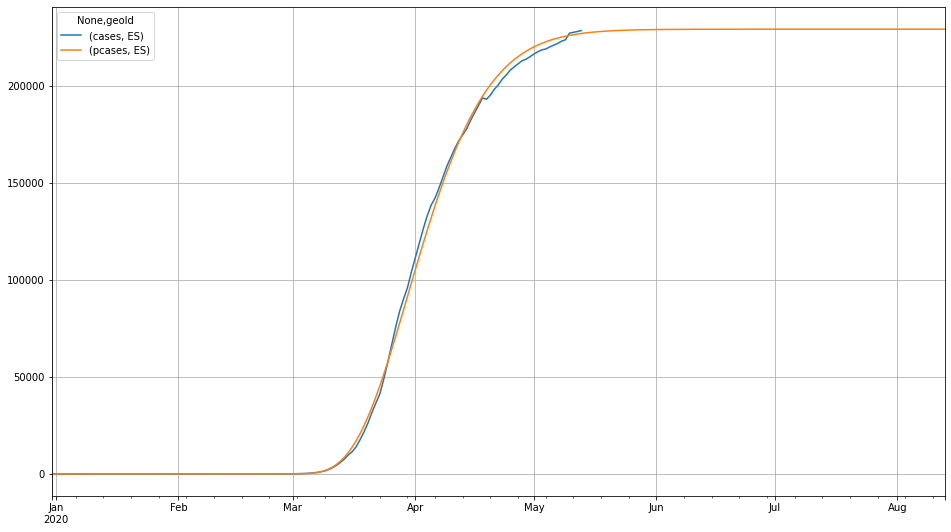

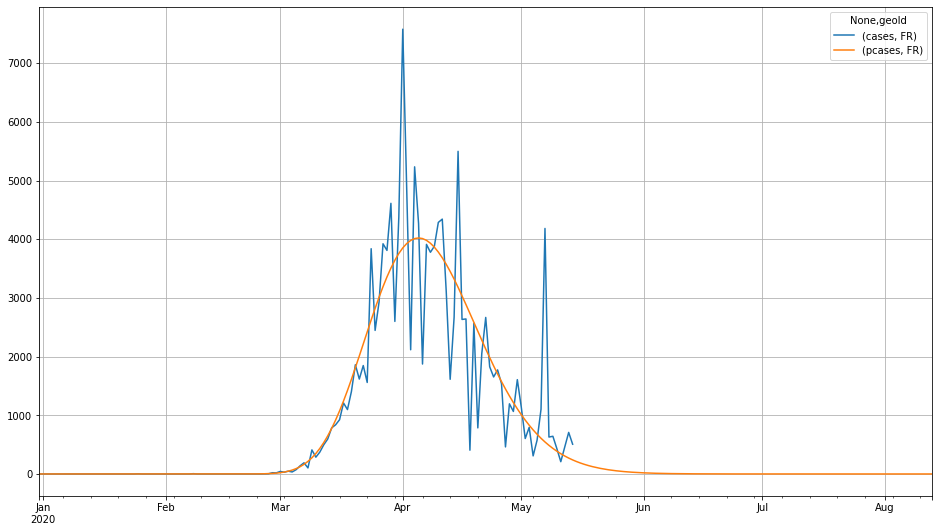

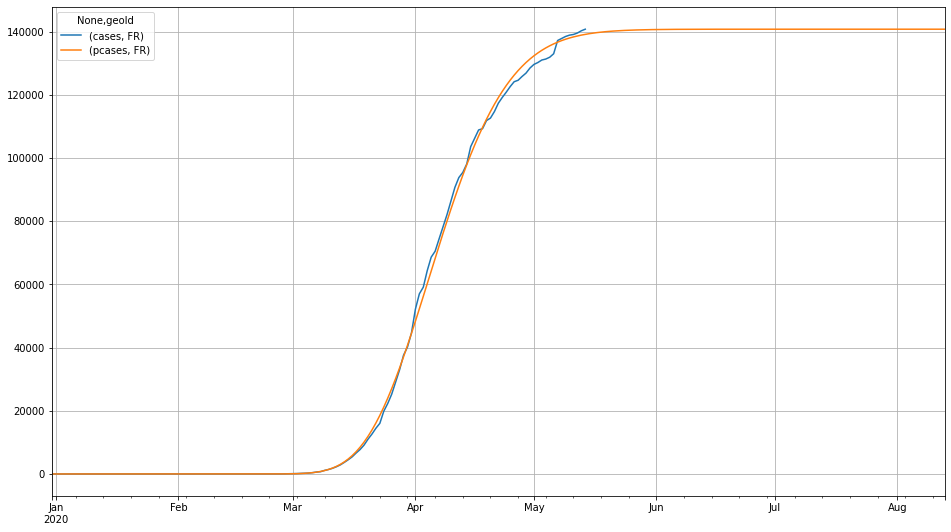

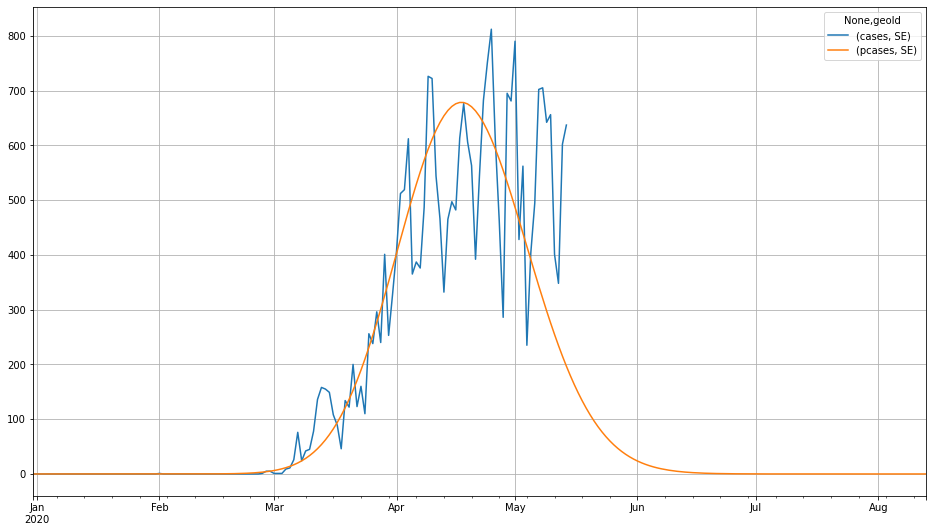

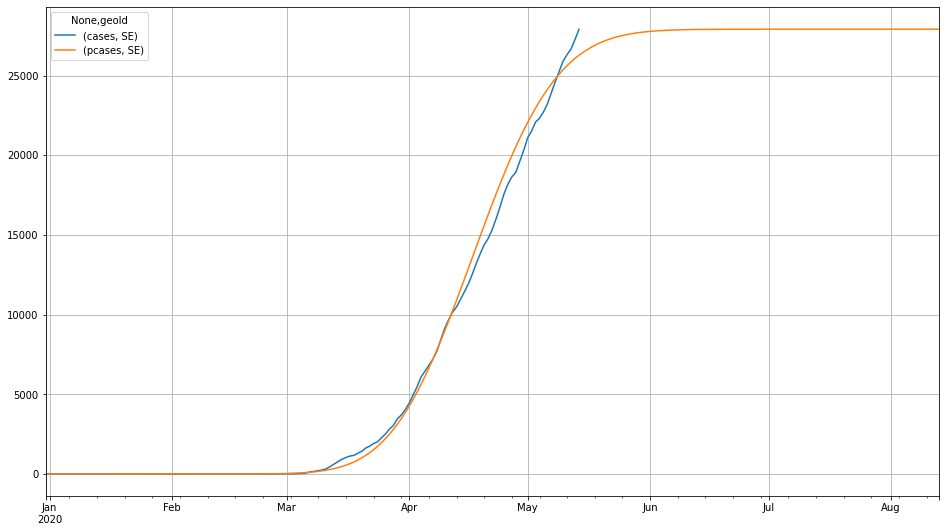

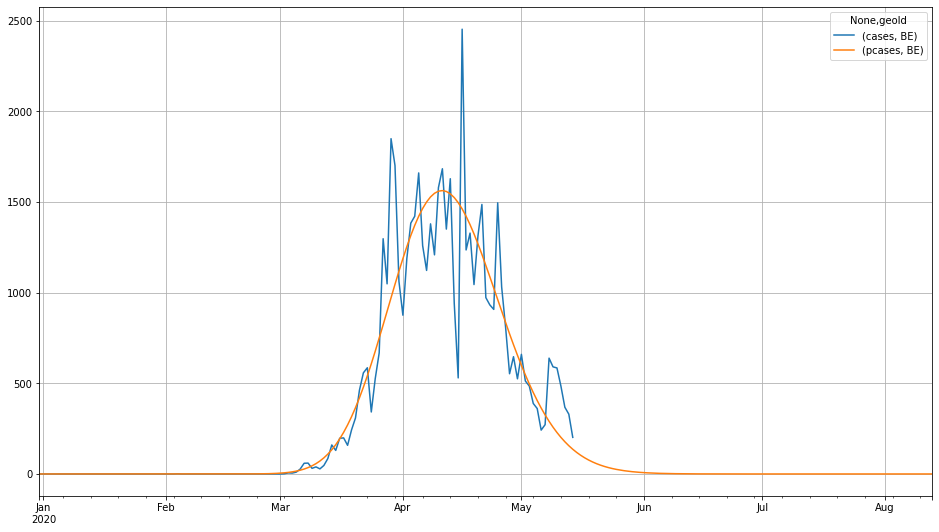

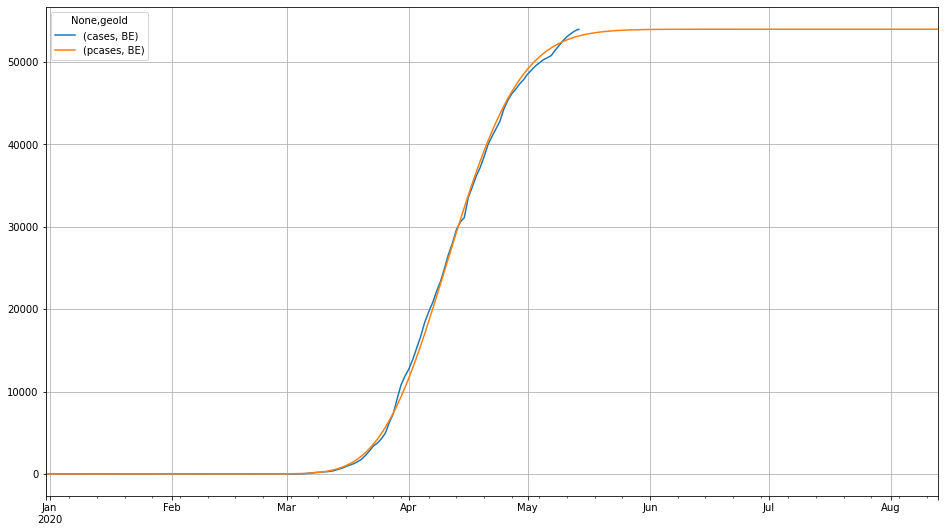

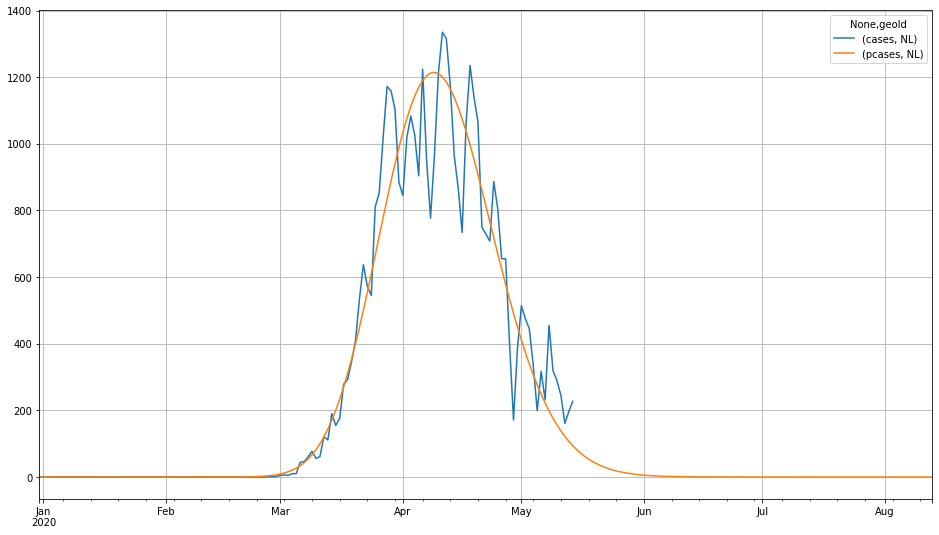

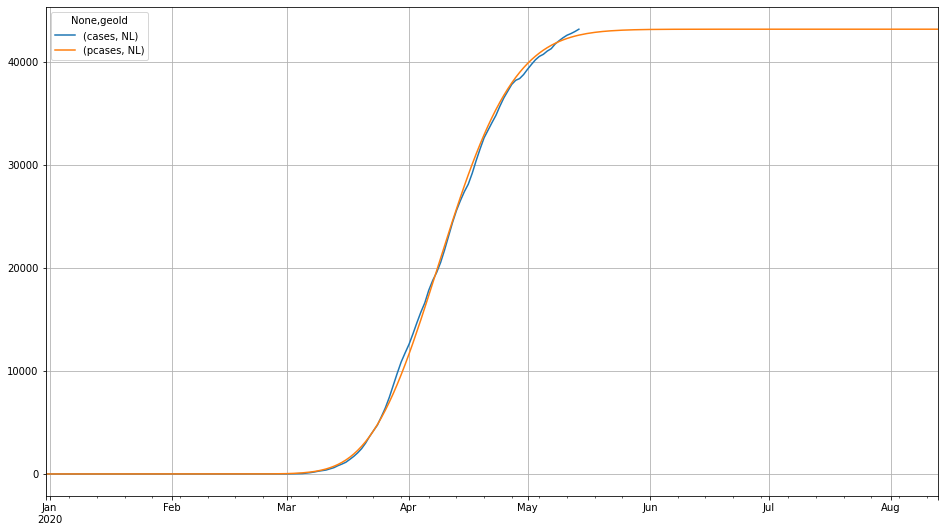

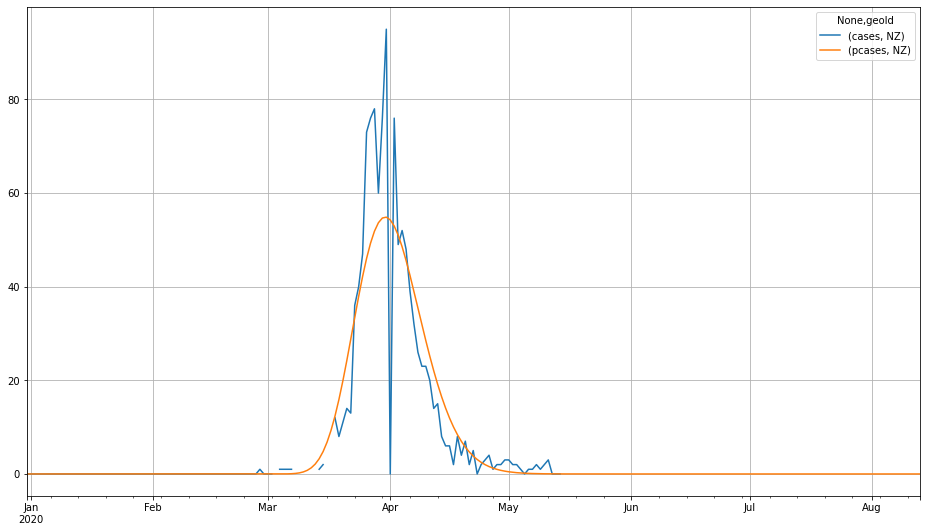

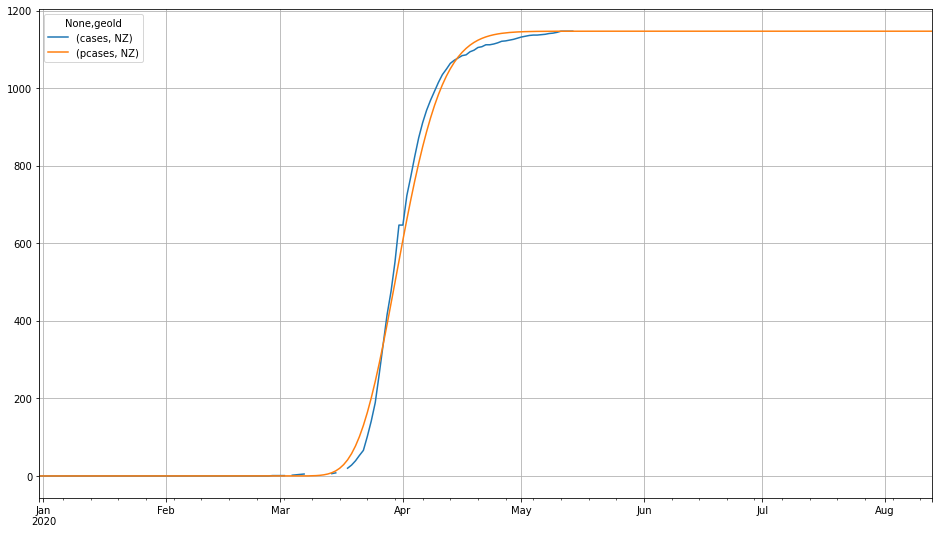

In [10]:
import scipy.stats as stats

# countries = df['geoId'].unique()

countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'FR', 'SE', 'BE', 'NL', 'NZ']

measure = 'cases'
pmeasure = 'pcases'

for country in countries:
    df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
    df_pred = df_pred[df_pred['y'] > 0]
    ft_data = np.array(df_pred.astype(int))
    xp_data = np.repeat(ft_data[:, 0], ft_data[:, 1])
    alpha, loc, scale = stats.gamma.fit(xp_data)
    print(country, alpha, loc, scale)
    df_geo[(pmeasure, country)] = stats.gamma.pdf(df_geo['daynum'], alpha, loc, scale) * len(xp_data)
    df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
    df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.